# Assignment Netwerkanalyse

## Notebook made by


|Naam|Studentnummer|
|-|-|
| Soufiane Zouli | 12871060 |
| Joana Al Ali | 11258985 |
| Dennis de Buck | 12903000 |
| Rogier Wesseling | 12868094 |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

Cijfer per student:
 12871060    0.9
11258985    0.9
12903000    1.3
12868094    1.0
dtype: float64


,12871060,11258985,12903000,12868094
12871060,0.23,0.24,0.29,0.24
11258985,0.20,0.20,0.40,0.20
12903000,0.23,0.22,0.28,0.27
12868094,0.22,0.24,0.30,0.24


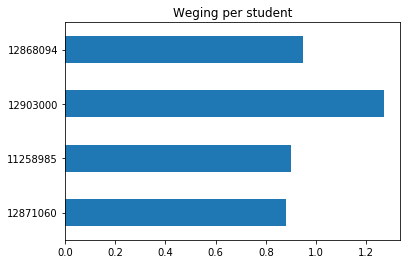

In [1]:
import pandas as pd
%matplotlib inline

def cijfer_per_student(weging,cijfer=1):
    return round(weging*cijfer,1)

weging= {
        12871060: {12871060:.23,11258985:.24,12903000:.29,12868094:.24},
        11258985: {12871060:.2,11258985:.2,12903000:.4,12868094:.2},
        12903000: {12871060:.23,11258985:.22,12903000:.28,12868094:.27},
        12868094: {12871060:.22,11258985:.24,12903000:.30,12868094:.24}
        }
# verander hier niks aan
df= pd.DataFrame(weging).T
assert all((df.sum(1)==1).values) # per student moeten de gewichten optellen tot 1
df.sum().plot(kind='barh', title='Weging per student');
print("Cijfer per student:\n",cijfer_per_student(df.sum()))
df

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

In [8]:
#!pip install rdflib
# See https://rdflib.readthedocs.io/en/stable/gettingstarted.html
from rdflib import  Graph
import networkx as nx
%matplotlib inline

In [9]:
g=Graph()
g.parse('http://dbpedia.org/resource/Michael_Jackson')

<Graph identifier=Nd9b31c5d68c1410aae608b03e86208d7 (<class 'rdflib.graph.Graph'>)>

In [10]:
triples= [triple for triple in g]
triples[:2], len(triples)

([(rdflib.term.URIRef('http://dbpedia.org/resource/American_Video_Awards'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Whitney_Houston_(album)'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'))],
 9368)

In [11]:
qres = g.query("""SELECT DISTINCT ?o ?p ?s WHERE {?o ?p ?s}""")

type(qres), len(qres), list(qres)[:2]

(rdflib.plugins.sparql.processor.SPARQLResult,
 9368,
 [(rdflib.term.URIRef('http://dbpedia.org/resource/American_Video_Awards'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Whitney_Houston_(album)'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'))])

# 1. Het Netwerk
### Om een RDF database te maken, moet er eerst een netwerk gedefinieerd zijn
Dit kun je doen op de volgende manier. In dit voorbeeld gebruiken we 4 families, waarbij de edges(x,y) betekenen dat x ouder is van y. Ook is geslacht gedefinieerd.

In [12]:
RogierFam=[('Piet','Joost'), ('Tona','Joost'), ('Piet','Winfried'), ('Tona','Winfried'), ('Piet','Kimo'), ('Tona','Kimo'),('Piet','Ralph'), ('Tona','Ralph'),('Hermance','Lian'),('Hermance', 'Dick'), ('Otto','Lian'), ('Otto','Dick'),('Joost','Matthijs'),('Lian','Matthijs'),('Joost','Simone'), ('Lian','Simone'), ('Joost','Rogier'), ('Lian','Rogier'),('Ralph','Niels'), ('Ralph','Pepijn'), ('Ralph','Karlijn'),('Dick','Steven'), ('Saskia','Steven'), ('Dick','Tessa'), ('Saskia','Tessa'),('Kimo','Tijmen')]
JoanaFam=[('Salim', 'Joana'), ('Salim', 'Serko'), ('Salim', 'Dara'), ('Salim', 'Djengo'), ('Salim', 'Kawa'), ('Salim', 'Chalat'), ('Salim', 'Lawien'), ('Amina', 'Joana'), ('Amina', 'Serko'), ('Amina', 'Dara'), ('Amina', 'Djengo'), ('Amina', 'Kawa'),('Amina', 'Chalat'), ('Amina', 'Lawien'), ('Kawa', 'Vyan'), ('Kawa', 'Helin'), ('Lawien', 'Odeus')]
SoufianeFam=[('AbdelAziz', 'Soufiane'),('AbdelAziz','Yassin'),('AbdelAziz','Younes'),('AbdelAziz','Nora'),('Asisa', 'Soufiane'),('Asisa','Yassin'),('Asisa','Younes'),('Asisa','Nora'),('Youssef','Adam'),('Youssef','Leila'),('Youssef','Alina'),('Hakima','Adam'),('Hakima','Leila'),('Hakima','Alina')]
DennisFam=[('Ron', 'Dennis'), ('Esther', 'Dennis'), ('Jasper', 'Ron'), ('Wilhelmina', 'Ron'), ('Jan', 'Esther'), ('Hannie', 'Esther'), ('Jan', 'Erik'), ('Hannie', 'Erik'), ('Erik', 'Cheyenne'), ('Erik', 'Zoë'), ('Yvonne', 'Cheyenne'), ('Yvonne', 'Zoë'), ('Jasper', 'Elly'), ('Wilhelmina', 'Elly'), ('Jasper', 'Richard'), ('Wilhelmina', 'Richard'), ('Elly', 'Vincent'), ('Willem', 'Vincent'), ('Vincent', 'Julliet'), ('Manon', 'Julliet'), ('Vincent', 'Olivier'), ('Manon', 'Olivier'), ('Arie', 'Jasper'), ('Elizabeth', 'Jasper')]

G=nx.DiGraph()
G.add_edges_from(RogierFam)
G.add_edges_from(JoanaFam)
G.add_edges_from(DennisFam)
G.add_edges_from(SoufianeFam)

Male={'Piet','Joost','Matthijs','Rogier','Winfried','Kimo','Tijmen','Ralph','Niels', 'Pepijn','Dick','Steven','Otto','Dennis', 'Ron', 'Jasper', 'Jan', 'Erik', 'Willem', 'Richard', 'Vincent', 'Olivier', 'Arie','AbdelAziz', 'Soufiane', 'Yassin', 'Younes', 'Youssef', 'Adam','Salim', 'Serko', 'Dara', 'Djengo', 'Kawa', 'Lawien', 'Odeus'}
Female={'Tona','Hermance','Lian','Simone','Karlijn','Saskia','Tessa','Esther', 'Wilhelmina', 'Hannie', 'Cheyenne', 'Zoë', 'Yvonne', 'Elly', 'Manon', 'Julliet', 'Elizabeth','Asisa','Nora', 'Hakima', 'Leila', 'Alina','Joana', 'Chalat', 'Amina', 'Vyan', 'Helin'}

for node in Male:
    G.nodes[node]['M']=True
    G.nodes[node]['V']=False
for node in Female:
    G.nodes[node]['M']=False 
    G.nodes[node]['V']=True

Voor de LHBTQI+ community moet er ook eerst een netwerk gemaakt worden. In dit voorbeeld gebruiken wij een liefdes cirkel met tien personen, waarbij de edges (x,y) betekenen dat x zich seksueel aangetrokken voelt tot y. 

In [13]:
LHBTQfam = [('Lisa','Sarah'), ('Tim','Lisa'), ('Tim','Tom'), ('Tom','Clara'), ('Clara','Gijs')
                 , ('Gijs','Pim'), ('Clara','Amy'), ('Amy','Laura')
                 , ('Laura','Koen')]

H = nx.DiGraph()
H.add_edges_from(LHBTQfam)

Male = {'Tim','Gijs','Koen', 'Pim', 'Tom'}
Female = {'Sarah','Clara','Lisa','Amy', 'Laura'}

for n in Male:
    H.nodes[n]['M']=True
    H.nodes[n]['V']=False
for n in Female:
    H.nodes[n]['M']=False
    H.nodes[n]['V']=True

# 2. Omschrijven naar RDF
### RDF is een vorm van een database
In deze databasevorm wordt er gebruik gemaakt van triples. Deze triples hebben een vaste vorm, namelijk: Subject, Predicate, Object. Bijvoorbeeld : ("Maarten Marx", " Geslacht", "Man"). Hier is Maarten Marx het subject, geslacht het predicaat en Man is het object. Hier staat dus: Maarten Marx is van het Mannelijke geslacht.

We schrijven een functie die een netwerkx graaf omschrijft naar een RDF database.

Om te beginnen moet er voor elke persoon in het netwerk een aparte code gemaakt worden. Deze komt in de vorm "http://example.org/subject" te staan. In het voorbeeld hierboven is deze code bijvoorbeeld: "http://example.org/MaartenMarx"
Omdat elk persoon een eigen naam heeft, gebruiken we {} en vullen we deze daarna in met .format(node). Hierdoor krijgt elk persoon zijn eigen code.

Vervolgens willen we bij elke persoon in onze graaf een geslacht meegeven. We maken hiervoor een propositie op FOAF basis.
We kijken of een persoon man of vrouw is, en zetten dit vervolgens als triple in de rdf graaf

Om het netwerk volledig in een RDF graaf te zetten, moet gedefinieerd worden dat bij elke edge, de eerste node een ouder is van de tweede node. Hiervoor hebben wij ook een FOAF propositie aangemaakt, FOAF.parent.


In [14]:
import rdflib
from rdflib import Graph, Literal, RDF, URIRef, Namespace
# rdflib knows about some namespaces, like FOAF
from rdflib.namespace import FOAF, XSD

def networkx2RDF(G):
    rdf = Graph()
    
    # Make variables
    EX = Namespace("http://example.org/")
    FOAF.parent = rdflib.term.URIRef("http://xmlns.com/foaf/0.1/parent")
    FOAF.gender = rdflib.term.URIRef("http://xmlns.com/foaf/0.1/gender")

    for node in G.nodes():
        # Create an RDF URI node to use as the subject for multiple triples
        subject = EX["{}".format(node)]
        rdf.add((subject, RDF.type, FOAF.Person))
        rdf.add((subject, FOAF.name, Literal(node)))
        
        # Add gender as triple
        if G.nodes[node]['M']==True:
            rdf.add((subject, FOAF.gender, Literal("Male")))
        if G.nodes[node]['V']==True:
            rdf.add((subject, FOAF.gender, Literal("Female")))
            
    # Add parent of child as triple
    for edge in G.edges():
        rdf.add((EX["{}".format(edge[0])],FOAF.parent, EX["{}".format(edge[1])]))

    return rdf

ab = networkx2RDF(G)
lhb = networkx2RDF(H)



# 3. Query's schrijven
### De RDF database doorzoeken

Wanneer de functie klaar is, moet er informatie uit de database gehaald kunnen worden. Door als het ware een vraag te stellen aan de database, krijg je een antwoord. Dit gebeurt in de taal van SPARQL. Dit is een taal waarbij query's gemakkelijk opgesteld kunnen worden. 

Dit gaat in een bepaalde vorm: SELECT ..... WHERE .... Dit staat voor: Geef me alle .... waar ... van toepassing is. 

In het onderstaande voorbeeld vragen wij 2 namen: ?aname en ?bname, waar ?a ouder is van ?b en waar ?a een man is. In normale taal betekent dit geef alle vaders. In SPARQL taal zoeken we alle relaties door, en kijkt hij bij elke relatie wie ouder is van wie, welk geslacht de ouder heeft, en pakt hij de namen van de ouders en kinderen. Als iemand man en ouder is, geeft SPARQL ons de naam van de vader en zijn kind. 
Al deze paren van vader en kind worden in een aparte database doorgegeven aan ons. Vervolgens kunnen wij voor elke rij in de database printen:  ?aname is de vader van ?bname. 

Daaronder zie je hetzelfde voorbeeld, maar dan voor moeders. Nu wordt er uiteraard gezocht naar elke ouder met het vrouwelijk geslacht.
Op deze manier kunnen wij alle familierelaties definieren. 

In [15]:
Vader = ab.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?a foaf:parent ?b.
          ?a foaf:gender "Male".
          ?a foaf:name ?aname.
          ?b foaf:name ?bname.
       }""",initNs = { "foaf": FOAF })

Vaders= [i for i in Vader]
for i in Vaders[:5]:
    print("%s is de vader van %s" %i)

Ron is de vader van Dennis
Kimo is de vader van Tijmen
Vincent is de vader van Julliet
Vincent is de vader van Olivier
Lawien is de vader van Odeus


In [16]:
Moeder = ab.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?a foaf:parent ?b.
          ?a foaf:gender "Female".
          ?a foaf:name ?aname.
          ?b foaf:name ?bname.
       }""",initNs = { "foaf": FOAF })

Moeders= [i for i in Moeder]
for i in Moeders[:5]:
    print("%s is de moeder van %s" %i)

Amina is de moeder van Dara
Amina is de moeder van Serko
Amina is de moeder van Kawa
Amina is de moeder van Djengo
Amina is de moeder van Joana


### Ook voor de andere familierelaties hebben wij query's gemaakt. Deze vind je hieronder:

In [17]:
Zoon = ab.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?b foaf:parent ?a.
          ?a foaf:name ?aname.
          ?a foaf:gender "Male".
          ?b foaf:name ?bname.
          
       }""",initNs = { "foaf": FOAF })

Dochter = ab.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?b foaf:parent ?a.
          ?a foaf:name ?aname.
          ?a foaf:gender "Female".
          ?b foaf:name ?bname.
          
       }""",initNs = { "foaf": FOAF })

Opa = ab.query(
    """SELECT DISTINCT ?aname ?cname
       WHERE {
          ?a foaf:parent ?b.
          ?b foaf:parent ?c.
          ?a foaf:name ?aname.
          ?a foaf:gender "Male".
          ?c foaf:name ?cname.
       }""",initNs = { "foaf": FOAF })

Oma = ab.query(
    """SELECT DISTINCT ?aname ?cname
       WHERE {
          ?a foaf:parent ?b.
          ?b foaf:parent ?c.
          ?a foaf:name ?aname.
          ?a foaf:gender "Female".
          ?c foaf:name ?cname.
       }""",initNs = { "foaf": FOAF })
    
Zus = ab.query(
    """SELECT DISTINCT ?aname ?cname
       WHERE {
          ?b foaf:parent ?a.
          ?b foaf:parent ?c.
          ?a foaf:name ?aname.
          ?a foaf:gender "Female".
          ?c foaf:name ?cname.
          FILTER(?a != ?c) .
       }""",initNs = { "foaf": FOAF })

Broer = ab.query(
    """SELECT DISTINCT ?aname ?cname
       WHERE {
          ?b foaf:parent ?a.
          ?b foaf:parent ?c.
          ?a foaf:name ?aname.
          ?a foaf:gender "Male".
          ?c foaf:name ?cname.
          FILTER(?a != ?c) .
       }""",initNs = { "foaf": FOAF })

Oom = ab.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?d foaf:parent ?a.
          ?d foaf:parent ?c.
          ?c foaf:parent ?b.
          ?a foaf:name ?aname.
          ?a foaf:gender "Male".
          ?b foaf:name ?bname.
          FILTER(?a != ?c)
       }""",initNs = { "foaf": FOAF })

Tante = ab.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?d foaf:parent ?a.
          ?d foaf:parent ?c.
          ?c foaf:parent ?b.
          ?a foaf:name ?aname.
          ?a foaf:gender "Female".
          ?b foaf:name ?bname.
          FILTER(?a != ?c)
       }""",initNs = { "foaf": FOAF })

Neef = ab.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?d foaf:parent ?e.
          ?d foaf:parent ?c.
          ?c foaf:parent ?b.
          ?e foaf:parent ?a.
          ?a foaf:name ?aname.
          ?a foaf:gender "Male".
          ?b foaf:name ?bname.
          FILTER(?e != ?c)
       }""",initNs = { "foaf": FOAF })

Nicht = ab.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?d foaf:parent ?e.
          ?d foaf:parent ?c.
          ?c foaf:parent ?b.
          ?e foaf:parent ?a.
          ?a foaf:name ?aname.
          ?a foaf:gender "Female".
          ?b foaf:name ?bname.
          FILTER(?e != ?c)
       }""",initNs = { "foaf": FOAF })
 
Neven= [i for i in Neef]
for i in Neven[:5]:
    print("%s is de neef van %s" %i)

Nichten= [i for i in Nicht]
for i in Nichten[:5]:
    print("%s is de nicht van %s" %i)
    
Tantes= [i for i in Tante]
for i in Tantes[:5]:
    print("%s is de tante van %s" %i)
    
Zoons= [i for i in Zoon]
for i in Zoons[:5]:
    print("%s is de zoon van %s" %i)
    
Dochters= [i for i in Dochter]
for i in Dochters[:5]:
    print("%s is de dochter van %s" %i)
    
Broers= [i for i in Broer]
for i in Broers[:5]:
    print("%s is de broer van %s" %i)
    
Zussen= [i for i in Zus]
for i in Zussen[:5]:
    print("%s is de zus van %s" %i)
    
Opas= [i for i in Opa]
for i in Opas[:5]:
    print("%s is de opa van %s" %i)
    
Omas= [i for i in Oma]
for i in Omas[:5]:
    print("%s is de oma van %s" %i)
    
Ooms= [i for i in Oom]
for i in Ooms[:5]:
    print("%s is de oom van %s" %i)

Odeus is de neef van Vyan
Odeus is de neef van Helin
Vincent is de neef van Dennis
Niels is de neef van Tijmen
Niels is de neef van Simone
Karlijn is de nicht van Tijmen
Karlijn is de nicht van Simone
Karlijn is de nicht van Rogier
Karlijn is de nicht van Matthijs
Zoë is de nicht van Dennis
Joana is de tante van Vyan
Joana is de tante van Helin
Joana is de tante van Odeus
Esther is de tante van Zoë
Esther is de tante van Cheyenne
Odeus is de zoon van Lawien
Ron is de zoon van Wilhelmina
Ron is de zoon van Jasper
Adam is de zoon van Hakima
Adam is de zoon van Youssef
Alina is de dochter van Youssef
Alina is de dochter van Hakima
Joana is de dochter van Amina
Joana is de dochter van Salim
Esther is de dochter van Jan
Ron is de broer van Elly
Ron is de broer van Richard
Adam is de broer van Leila
Adam is de broer van Alina
Kimo is de broer van Joost
Alina is de zus van Leila
Alina is de zus van Adam
Joana is de zus van Dara
Joana is de zus van Serko
Joana is de zus van Kawa
Jan is de opa 

Voor de LHBTQI+ community wordt de RDF database doorzocht om te kijken wat iemands seksuele voorkeur is. Dit wordt gedaan door het geslacht van de persoon en de geslacht(en) van de person(en) waar diegene op valt te bekijken. We kijken hier dan naar persoon ?a en persoon ?b, en het bijbehorende geslacht, waarbij ?a de relatie*  'valt op ...' heeft met ?b. <br><br>
*in de code heet deze relatie 'foaf:parent'.


In [18]:
lesbian = lhb.query(
    """SELECT DISTINCT ?aname ?bname
        WHERE {
        ?a foaf:parent ?b.
        ?a foaf:gender "Female".
        ?b foaf:gender "Female".
        ?a foaf:name ?aname.
        ?b foaf:name ?bname.
        }""",initNs = { "foaf": FOAF })

homos = lhb.query(
    """SELECT DISTINCT ?aname ?bname
        WHERE {
        ?a foaf:parent ?b.
        ?a foaf:gender "Male".
        ?b foaf:gender "Male".
        ?a foaf:name ?aname.
        ?b foaf:name ?bname.
        }""",initNs = { "foaf": FOAF })

Bi = lhb.query(
    """SELECT DISTINCT ?aname
        WHERE {
        ?a foaf:parent ?b.
        ?a foaf:parent ?c.
        ?b foaf:gender "Female".
        ?c foaf:gender "Male".
        ?a foaf:name ?aname.
        }""",initNs = { "foaf": FOAF })

for row in lesbian:
    print("%s is lesbisch" % row[0])
    
for row in homos:
    print("%s is homo" % row[0])

for row in Bi:
    print("%s is bi" % row)

Amy is lesbisch
Lisa is lesbisch
Clara is lesbisch
Gijs is homo
Tim is homo
Clara is bi
Tim is bi


# 4. Rollen omdraaien
### Een rdflib database omzetten naar een Netwerk

Dit kan vrij simpel met de functie: <code>rdflib_to_networkx_graph()</code>. 
We beginnen met een online bron voor een database, bijvoorbeeld de bron van de Amerikaanse rapper Biggie: 'https://dbpedia.org/resource/The_Notorious_B.I.G.'
Deze zet je in een rdflib database met twee regels: <br><br>
<code>big=Graph()</code> &#8594; (hier maak je een Graph)<br>
<code>big.parse('https://dbpedia.org/resource/The_Notorious_B.I.G.')</code> &#8594; (de Graph wordt gevuld met data uit de bron)<br>

vervolgens gebruik je de <code>rdflib_to_networkx_graph()</code> functie om de RDFLIB database om te zetten naar een netwerk. 


In [ ]:
# Conversion of rdflib.Graph to networkx.Graph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
big=Graph()
big.parse('https://dbpedia.org/resource/The_Notorious_B.I.G.')
netwerk = rdflib_to_networkx_graph(big)
print("networkx Graph loaded successfully with length {}".format(len(big)))
nx.draw(netwerk)
print("gemiddelde kortste pad is :", nx.average_shortest_path_length(netwerk))
print("De degree centrality voor de hoofdpersoon in de graaf is:", nx.degree_centrality((netwerk))[rdflib.term.URIRef('http://dbpedia.org/resource/The_Notorious_B.I.G.')])
avg_deg = 2*netwerk.number_of_edges() / netwerk.number_of_nodes()
print("De 'average degree' van dit netwerk is %s" %avg_deg)
print("De density van dit netwerk is %s" %nx.density(netwerk))

networkx Graph loaded successfully with length 2406
